# 🔍 ANOMALY DETECTION IN MAMBA SEEDLING STUDENTS
## Phase 2: PREPARATION (Feature Engineering)

---

### OBJECTIVES OF THIS PHASE:
1. Load data from initial analysis (EDA)
2. Create derived features relevant for anomaly detection
3. Normalize data using Min-Max Scaling (0-1 range)
4. Handle missing values
5. Prepare data for modeling

### EXPECTED OUTPUT:
- Normalized and clean dataset
- Derived features created
- Data ready for anomaly models

## CELL 5: CREATE DERIVED FEATURES

Derived features are combinations of original variables that capture important concepts for anomaly detection.

In [1]:
# 5. IMPORT LIBRARIES AND LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

# Configure visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")

# Load data
data_path = r'c:\Users\DELL\Documents\GitHub\material-DT-1\Análisis Nuevo\data\RespuestasSemillero_completo.json'

with open(data_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

df = pd.DataFrame(json_data)
print(f"✅ Data loaded: {df.shape[0]} students × {df.shape[1]} variables")

✅ Libraries imported successfully
✅ Data loaded: 81 students × 35 variables


In [2]:
# 5.1 CONVERT TO NUMERIC
df_prepared = df.copy()

# Convert all columns to numeric
for col in df_prepared.columns:
    try:
        df_prepared[col] = pd.to_numeric(df_prepared[col], errors='coerce')
    except:
        pass

print(f"✅ Conversion to numeric data completed")
print(f"\n📊 First 5 rows:")
df_prepared.head()

✅ Conversion to numeric data completed

📊 First 5 rows:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,0,21,5,1,3,4,2,3,7,NaN,...,1,1,9,17,NaN,NaN,4,5,4,4
1,0,20,5,1,2,5,6,4,0,NaN,...,0,0,8,17,NaN,NaN,2,3,4,4
2,1,23,5,1,2,3,2,1,2,NaN,...,0,0,10,18,NaN,NaN,2,4,4,4
3,1,25,5,1,3,5,4,8,0,NaN,...,0,0,10,22,NaN,NaN,2,4,4,5
4,1,21,5,1,2,4,1,1,2,NaN,...,1,1,8,18,NaN,NaN,2,3,4,4


In [3]:
# 5.2 CREATE DERIVED FEATURES

print("="*80)
print("CREATION OF DERIVED FEATURES")
print("="*80)

# Feature 1: Average Academic Performance
df_prepared['F_Average_Performance'] = (df_prepared['Q33'] + df_prepared['Q34'] + df_prepared['Q35']) / 3
print(f"\n✅ F1: Average_Performance = (Q33 + Q34 + Q35) / 3")
print(f"    Range: {df_prepared['F_Average_Performance'].min():.2f} - {df_prepared['F_Average_Performance'].max():.2f}")
print(f"    Mean: {df_prepared['F_Average_Performance'].mean():.2f}")

# Feature 2: Academic Load
df_prepared['F_Academic_Load'] = df_prepared['Q7'] + df_prepared['Q8'] + df_prepared['Q9']
print(f"\n✅ F2: Academic_Load = Q7 + Q8 + Q9")
print(f"    Range: {df_prepared['F_Academic_Load'].min():.2f} - {df_prepared['F_Academic_Load'].max():.2f}")
print(f"    Mean: {df_prepared['F_Academic_Load'].mean():.2f}")

# Feature 3: Life Balance (work vs study)
df_prepared['F_Life_Balance'] = df_prepared['Q20'] / (df_prepared['F_Academic_Load'] + 1)
print(f"\n✅ F3: Life_Balance = Q20 / (Academic_Load + 1)")
print(f"    Range: {df_prepared['F_Life_Balance'].min():.2f} - {df_prepared['F_Life_Balance'].max():.2f}")
print(f"    Mean: {df_prepared['F_Life_Balance'].mean():.2f}")
print(f"    (Higher values = more work than study)")

# Feature 4: Psychological Stress
df_prepared['F_Psychological_Stress'] = (df_prepared['Q17'] + df_prepared['Q18']) / 2
print(f"\n✅ F4: Psychological_Stress = (Q17 + Q18) / 2")
print(f"    Range: {df_prepared['F_Psychological_Stress'].min():.2f} - {df_prepared['F_Psychological_Stress'].max():.2f}")
print(f"    Mean: {df_prepared['F_Psychological_Stress'].mean():.2f}")

# Feature 5: Family Support
df_prepared['F_Family_Support'] = df_prepared['Q12'] + df_prepared['Q13']
print(f"\n✅ F5: Family_Support = Q12 + Q13")
print(f"    Range: {df_prepared['F_Family_Support'].min():.0f} - {df_prepared['F_Family_Support'].max():.0f}")
print(f"    Mean: {df_prepared['F_Family_Support'].mean():.2f}")

# Feature 6: Grade Consistency (Standard Deviation)
df_prepared['F_Grade_Consistency'] = df_prepared[['Q33', 'Q34', 'Q35']].std(axis=1)
print(f"\n✅ F6: Grade_Consistency = std(Q33, Q34, Q35)")
print(f"    Range: {df_prepared['F_Grade_Consistency'].min():.2f} - {df_prepared['F_Grade_Consistency'].max():.2f}")
print(f"    Mean: {df_prepared['F_Grade_Consistency'].mean():.2f}")
print(f"    (Higher values = more inconsistency in grades)")

# Feature 7: Responsibility-Result Index
df_prepared['F_Responsibility_Result_Index'] = df_prepared['Q3'] / (df_prepared['F_Average_Performance'] + 1)
print(f"\n✅ F7: Responsibility_Result_Index = Q3 / (Average_Performance + 1)")
print(f"    Range: {df_prepared['F_Responsibility_Result_Index'].min():.2f} - {df_prepared['F_Responsibility_Result_Index'].max():.2f}")
print(f"    Mean: {df_prepared['F_Responsibility_Result_Index'].mean():.2f}")
print(f"    (Higher values = responsible but low performance)")

# Feature 8: Parental Education Level
df_prepared['F_Parental_Education'] = df_prepared['Q15'] + df_prepared['Q16']
print(f"\n✅ F8: Parental_Education = Q15 + Q16")
print(f"    Range: {df_prepared['F_Parental_Education'].min():.0f} - {df_prepared['F_Parental_Education'].max():.0f}")
print(f"    Mean: {df_prepared['F_Parental_Education'].mean():.2f}")

# Feature 9: Socioeconomic Risk (low stratum + no financial support)
df_prepared['F_Socioeconomic_Risk'] = (6 - df_prepared['Q32']) + (1 - df_prepared['Q21'])
print(f"\n✅ F9: Socioeconomic_Risk = (6 - Q32) + (1 - Q21)")
print(f"    Range: {df_prepared['F_Socioeconomic_Risk'].min():.2f} - {df_prepared['F_Socioeconomic_Risk'].max():.2f}")
print(f"    Mean: {df_prepared['F_Socioeconomic_Risk'].mean():.2f}")
print(f"    (Higher values = higher socioeconomic risk)")

# Feature 10: Interest-Performance Gap
df_prepared['F_Interest_Performance_Gap'] = abs(df_prepared['Q6'] - (df_prepared['F_Average_Performance'] / 3))
print(f"\n✅ F10: Interest_Performance_Gap = |Q6 - (Average_Performance/3)|")
print(f"    Range: {df_prepared['F_Interest_Performance_Gap'].min():.2f} - {df_prepared['F_Interest_Performance_Gap'].max():.2f}")
print(f"    Mean: {df_prepared['F_Interest_Performance_Gap'].mean():.2f}")
print(f"    (Higher values = mismatch between interest and performance)")

print(f"\n\n✅ TOTAL DERIVED FEATURES: 10")
print(f"   Original dimension: {df.shape[1]}")
print(f"   Dimension after features: {df_prepared.shape[1]}")

CREATION OF DERIVED FEATURES

✅ F1: Average_Performance = (Q33 + Q34 + Q35) / 3
    Range: 2.00 - 5.00
    Mean: 3.81

✅ F2: Academic_Load = Q7 + Q8 + Q9
    Range: 3.00 - 25.00
    Mean: 10.10

✅ F3: Life_Balance = Q20 / (Academic_Load + 1)
    Range: 0.00 - 10.00
    Mean: 1.88
    (Higher values = more work than study)

✅ F4: Psychological_Stress = (Q17 + Q18) / 2
    Range: 1.00 - 4.50
    Mean: 2.22

✅ F5: Family_Support = Q12 + Q13
    Range: 0 - 14
    Mean: 3.60

✅ F6: Grade_Consistency = std(Q33, Q34, Q35)
    Range: 0.00 - 2.31
    Mean: 0.38
    (Higher values = more inconsistency in grades)

✅ F7: Responsibility_Result_Index = Q3 / (Average_Performance + 1)
    Range: 0.46 - 1.67
    Mean: 0.93
    (Higher values = responsible but low performance)

✅ F8: Parental_Education = Q15 + Q16
    Range: 2 - 12
    Mean: 5.98

✅ F9: Socioeconomic_Risk = (6 - Q32) + (1 - Q21)
    Range: 2.00 - 6.00
    Mean: 4.26
    (Higher values = higher socioeconomic risk)

✅ F10: Interest_Perfor

## CELL 6: MIN-MAX NORMALIZATION

Min-Max normalization (feature scaling) transforms data to a 0-1 range. This is essential for anomaly detection algorithms.

In [4]:
# 6. MIN-MAX NORMALIZATION

print("="*80)
print("MIN-MAX NORMALIZATION")
print("="*80)

from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
numeric_cols = df_prepared.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 Columns to normalize: {len(numeric_cols)}")
print(f"   {numeric_cols}")

# Create a copy for normalized data
df_normalized = df_prepared.copy()

# Initialize scaler (0-1 range)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
df_normalized[numeric_cols] = scaler.fit_transform(df_prepared[numeric_cols])

print(f"\n✅ Min-Max normalization completed")
print(f"\n📋 Statistics AFTER normalization:")
print(f"\n   Min value (all variables): {df_normalized[numeric_cols].min().min():.6f} (≈ 0)")
print(f"   Max value (all variables): {df_normalized[numeric_cols].max().max():.6f} (≈ 1)")
print(f"   Mean of all variables: {df_normalized[numeric_cols].mean().mean():.6f}")

print(f"\n📊 First 5 NORMALIZED rows:")
df_normalized.head()

MIN-MAX NORMALIZATION

📊 Columns to normalize: 45
   ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'F_Average_Performance', 'F_Academic_Load', 'F_Life_Balance', 'F_Psychological_Stress', 'F_Family_Support', 'F_Grade_Consistency', 'F_Responsibility_Result_Index', 'F_Parental_Education', 'F_Socioeconomic_Risk', 'F_Interest_Performance_Gap']

✅ Min-Max normalization completed

📋 Statistics AFTER normalization:

   Min value (all variables): 0.000000 (≈ 0)
   Max value (all variables): 1.000000 (≈ 1)
   Mean of all variables: 0.461321

📊 First 5 NORMALIZED rows:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,F_Average_Performance,F_Academic_Load,F_Life_Balance,F_Psychological_Stress,F_Family_Support,F_Grade_Consistency,F_Responsibility_Result_Index,F_Parental_Education,F_Socioeconomic_Risk,F_Interest_Performance_Gap
0,0.0,0.222222,1.0,1.0,1.0,0.666667,0.250,0.375,0.466667,NaN,...,0.777778,0.409091,0.000000,0.428571,0.285714,0.25,0.394947,0.8,0.00,0.466667
1,0.0,0.166667,1.0,1.0,0.0,1.000000,0.750,0.500,0.000000,NaN,...,0.555556,0.318182,0.000000,0.285714,0.214286,0.25,0.506079,0.3,0.75,0.833333
2,1.0,0.333333,1.0,1.0,0.0,0.333333,0.250,0.125,0.133333,NaN,...,0.666667,0.090909,0.666667,0.142857,0.142857,0.00,0.446809,0.3,0.75,0.200000
3,1.0,0.444444,1.0,1.0,1.0,1.000000,0.500,1.000,0.000000,NaN,...,0.777778,0.409091,0.384615,0.142857,0.428571,0.25,0.394947,0.2,0.75,0.766667
4,1.0,0.222222,1.0,1.0,0.0,0.666667,0.125,0.125,0.133333,NaN,...,0.555556,0.045455,0.400000,0.428571,0.214286,0.25,0.506079,0.4,0.50,0.533333


In [5]:
# 6.1 VERIFY NORMALIZATION - BEFORE AND AFTER

print("\n" + "="*80)
print("COMPARISON: BEFORE AND AFTER NORMALIZATION")
print("="*80)

comparison_vars = ['F_Average_Performance', 'F_Academic_Load', 'F_Psychological_Stress', 
                    'F_Life_Balance', 'F_Responsibility_Result_Index']

for var in comparison_vars:
    print(f"\n{var}:")
    print(f"   BEFORE:  Min={df_prepared[var].min():7.3f}, Max={df_prepared[var].max():7.3f}")
    print(f"   AFTER:   Min={df_normalized[var].min():7.3f}, Max={df_normalized[var].max():7.3f}")


COMPARISON: BEFORE AND AFTER NORMALIZATION

F_Average_Performance:
   BEFORE:  Min=  2.000, Max=  5.000
   AFTER:   Min=  0.000, Max=  1.000

F_Academic_Load:
   BEFORE:  Min=  3.000, Max= 25.000
   AFTER:   Min=  0.000, Max=  1.000

F_Psychological_Stress:
   BEFORE:  Min=  1.000, Max=  4.500
   AFTER:   Min=  0.000, Max=  1.000

F_Life_Balance:
   BEFORE:  Min=  0.000, Max= 10.000
   AFTER:   Min=  0.000, Max=  1.000

F_Responsibility_Result_Index:
   BEFORE:  Min=  0.462, Max=  1.667
   AFTER:   Min=  0.000, Max=  1.000


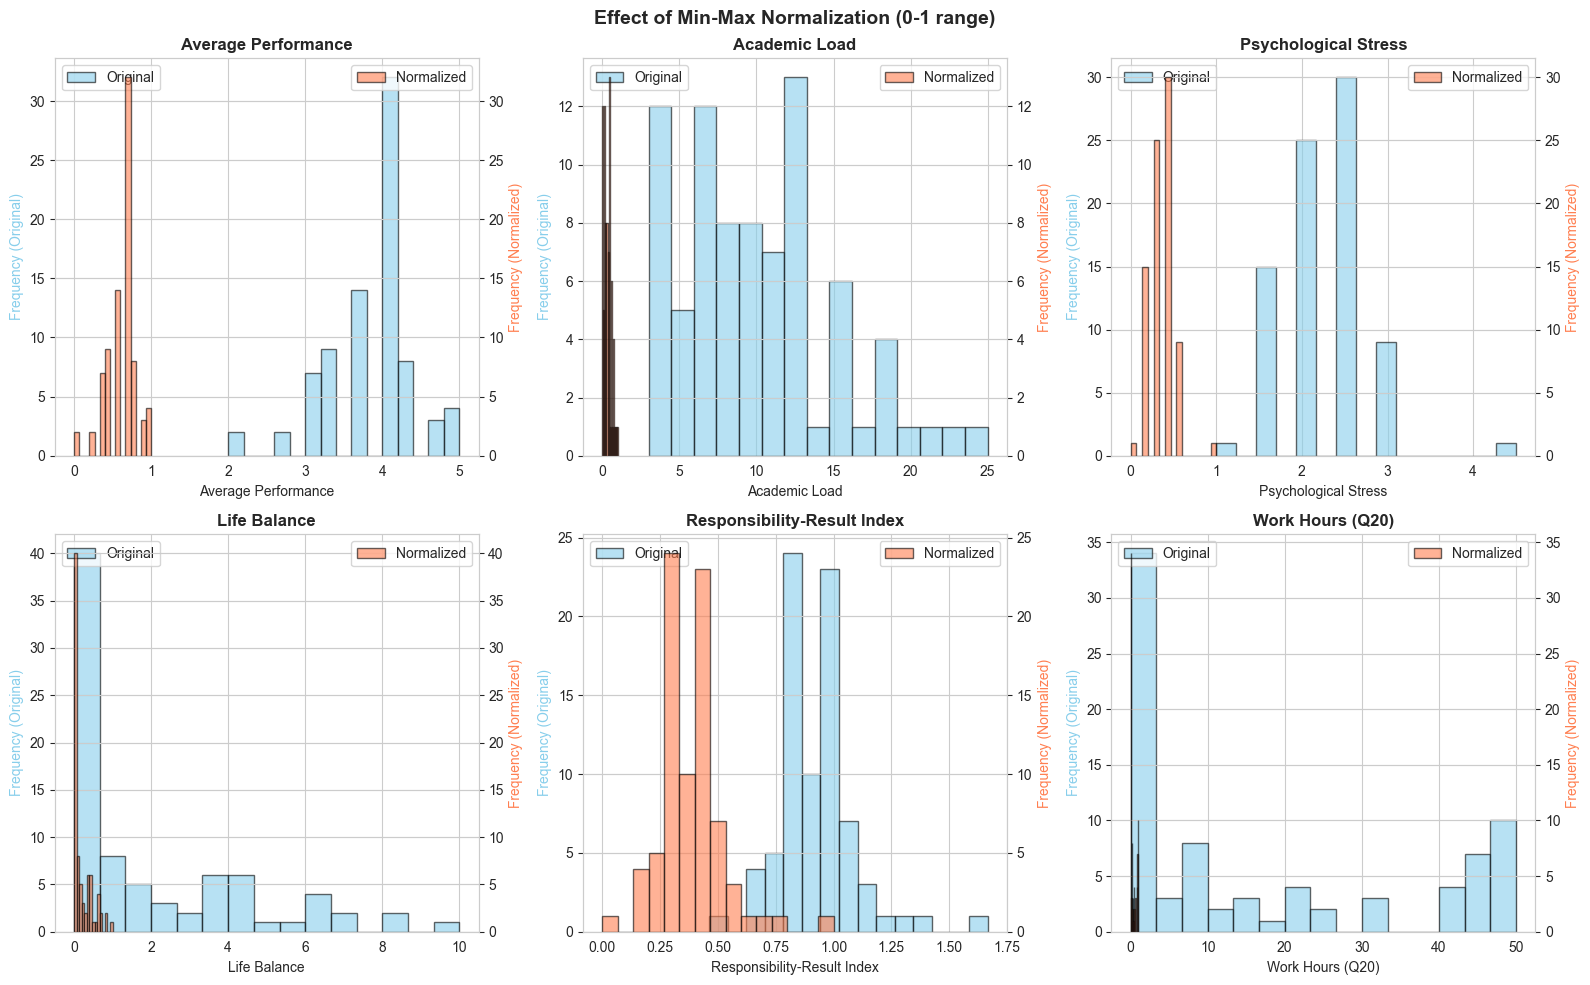

✅ Visualization completed


In [6]:
# 6.2 VISUALIZATION OF NORMALIZATION EFFECT

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Effect of Min-Max Normalization (0-1 range)', fontsize=14, fontweight='bold')

variables_to_plot = [
    ('F_Average_Performance', 'Average Performance'),
    ('F_Academic_Load', 'Academic Load'),
    ('F_Psychological_Stress', 'Psychological Stress'),
    ('F_Life_Balance', 'Life Balance'),
    ('F_Responsibility_Result_Index', 'Responsibility-Result Index'),
    ('Q20', 'Work Hours (Q20)')
]

for idx, (var, label) in enumerate(variables_to_plot):
    row = idx // 3
    col = idx % 3
    
    # Original distribution
    axes[row, col].hist(df_prepared[var].dropna(), bins=15, alpha=0.6, label='Original', color='skyblue', edgecolor='black')
    
    # Normalized distribution
    axes_twin = axes[row, col].twinx()
    axes_twin.hist(df_normalized[var].dropna(), bins=15, alpha=0.6, label='Normalized', color='coral', edgecolor='black')
    
    axes[row, col].set_xlabel(label)
    axes[row, col].set_ylabel('Frequency (Original)', color='skyblue')
    axes_twin.set_ylabel('Frequency (Normalized)', color='coral')
    axes[row, col].set_title(label, fontweight='bold')
    axes[row, col].legend(loc='upper left')
    axes_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("✅ Visualization completed")

## CELL 7: HANDLING MISSING VALUES

Detect, analyze and treat missing values (NaN) in the dataset.

In [7]:
# 7. HANDLING MISSING VALUES

print("="*80)
print("ANALYSIS OF MISSING VALUES")
print("="*80)

# Count missing values in original data
missing_original = df_prepared.isnull().sum()
missing_percent = (missing_original / len(df_prepared)) * 100

missing_df = pd.DataFrame({
    'Variable': missing_original.index,
    'Missing_Count': missing_original.values,
    'Missing_Percent': missing_percent.values
}).sort_values('Missing_Percent', ascending=False)

print(f"\n📊 MISSING VALUES SUMMARY:")
print(f"   Total variables: {len(missing_df)}")
print(f"   Variables with missing data: {(missing_original > 0).sum()}")
print(f"   COMPLETE variables: {(missing_original == 0).sum()}")

if (missing_original > 0).sum() > 0:
    print(f"\n📋 Variables WITH missing data:")
    variables_with_missing = missing_df[missing_df['Missing_Count'] > 0]
    for idx, row in variables_with_missing.iterrows():
        print(f"   {row['Variable']:25s}: {int(row['Missing_Count']):3d} ({row['Missing_Percent']:5.1f}%)")
else:
    print(f"\n✅ NO missing values in the dataset")

ANALYSIS OF MISSING VALUES

📊 MISSING VALUES SUMMARY:
   Total variables: 45
   Variables with missing data: 3
   COMPLETE variables: 42

📋 Variables WITH missing data:
   Q10                      :  81 (100.0%)
   Q30                      :  81 (100.0%)
   Q31                      :  81 (100.0%)


In [8]:
# 7.1 STRATEGY FOR HANDLING MISSING VALUES

print("\n" + "="*80)
print("STRATEGY FOR HANDLING MISSING VALUES")
print("="*80)

# Make a copy for handling missing values
df_clean = df_normalized.copy()

# Get numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Strategy 1: Drop rows where too many values are missing (> 30%)
missing_per_row = df_clean[numeric_cols].isnull().sum(axis=1)
threshold_missing = len(numeric_cols) * 0.3  # 30% threshold

rows_to_drop = missing_per_row[missing_per_row > threshold_missing].index
print(f"\n1️⃣  Drop rows with > 30% missing data")
print(f"    Rows to drop: {len(rows_to_drop)}")
print(f"    Remaining rows: {len(df_clean) - len(rows_to_drop)}")

if len(rows_to_drop) > 0:
    df_clean = df_clean.drop(rows_to_drop)
    print(f"    ✅ Rows dropped")
else:
    print(f"    ✅ No rows with > 30% missing data")

# Strategy 2: Impute missing values with median
print(f"\n2️⃣  Impute missing values with MEDIAN")
print(f"    Variables with missing data:")

missing_after_drop = df_clean[numeric_cols].isnull().sum()
missing_after_drop = missing_after_drop[missing_after_drop > 0]

for var in missing_after_drop.index:
    median_val = df_clean[var].median()
    count = df_clean[var].isnull().sum()
    df_clean[var].fillna(median_val, inplace=True)
    print(f"    ✅ {var:25s}: {count} values filled with median={median_val:.2f}")

if len(missing_after_drop) == 0:
    print(f"    ✅ No missing values to fill")

print(f"\n✅ MISSING VALUES TREATMENT COMPLETED")
print(f"    Final rows: {len(df_clean)}")
print(f"    Remaining missing values: {df_clean[numeric_cols].isnull().sum().sum()}")


STRATEGY FOR HANDLING MISSING VALUES

1️⃣  Drop rows with > 30% missing data
    Rows to drop: 0
    Remaining rows: 81
    ✅ No rows with > 30% missing data

2️⃣  Impute missing values with MEDIAN
    Variables with missing data:
    ✅ Q10                      : 81 values filled with median=nan
    ✅ Q30                      : 81 values filled with median=nan
    ✅ Q31                      : 81 values filled with median=nan

✅ MISSING VALUES TREATMENT COMPLETED
    Final rows: 81
    Remaining missing values: 243


In [9]:
# 7.2 VERIFICATION OF DATA QUALITY

print("\n" + "="*80)
print("FINAL DATA QUALITY VERIFICATION")
print("="*80)

print(f"\n📊 FINAL SUMMARY:")
print(f"   Original students: {len(df)}")
print(f"   Students after cleaning: {len(df_clean)}")
print(f"   Dropped students: {len(df) - len(df_clean)}")

print(f"\n   Original variables: {df.shape[1]}")
print(f"   Variables with derived features: {df_clean.shape[1]}")
print(f"   Derived features created: {df_clean.shape[1] - df.shape[1]}")

print(f"\n   Total missing values: {df_clean.isnull().sum().sum()}")
print(f"   Data completeness: {100 * (1 - df_clean.isnull().sum().sum() / (df_clean.shape[0] * df_clean.shape[1])):.2f}%")

print(f"\n   Normalization range: [0, 1] (Min-Max)")
print(f"   Data ready for anomaly detection modeling")

print(f"\n✅ DATA READY FOR MODELING")
print(f"\n📋 First 5 rows of final dataset (normalized and clean):")
df_clean.head()


FINAL DATA QUALITY VERIFICATION

📊 FINAL SUMMARY:
   Original students: 81
   Students after cleaning: 81
   Dropped students: 0

   Original variables: 35
   Variables with derived features: 45
   Derived features created: 10

   Total missing values: 243
   Data completeness: 93.33%

   Normalization range: [0, 1] (Min-Max)
   Data ready for anomaly detection modeling

✅ DATA READY FOR MODELING

📋 First 5 rows of final dataset (normalized and clean):


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,F_Average_Performance,F_Academic_Load,F_Life_Balance,F_Psychological_Stress,F_Family_Support,F_Grade_Consistency,F_Responsibility_Result_Index,F_Parental_Education,F_Socioeconomic_Risk,F_Interest_Performance_Gap
0,0.0,0.222222,1.0,1.0,1.0,0.666667,0.250,0.375,0.466667,NaN,...,0.777778,0.409091,0.000000,0.428571,0.285714,0.25,0.394947,0.8,0.00,0.466667
1,0.0,0.166667,1.0,1.0,0.0,1.000000,0.750,0.500,0.000000,NaN,...,0.555556,0.318182,0.000000,0.285714,0.214286,0.25,0.506079,0.3,0.75,0.833333
2,1.0,0.333333,1.0,1.0,0.0,0.333333,0.250,0.125,0.133333,NaN,...,0.666667,0.090909,0.666667,0.142857,0.142857,0.00,0.446809,0.3,0.75,0.200000
3,1.0,0.444444,1.0,1.0,1.0,1.000000,0.500,1.000,0.000000,NaN,...,0.777778,0.409091,0.384615,0.142857,0.428571,0.25,0.394947,0.2,0.75,0.766667
4,1.0,0.222222,1.0,1.0,0.0,0.666667,0.125,0.125,0.133333,NaN,...,0.555556,0.045455,0.400000,0.428571,0.214286,0.25,0.506079,0.4,0.50,0.533333


In [10]:
# 7.3 SAVE PREPROCESSED DATA FOR NEXT PHASE

print("\n" + "="*80)
print("SAVE PREPROCESSED DATA")
print("="*80)

# Save cleaned and normalized data
output_path = r'c:\Users\DELL\Documents\GitHub\material-DT-1\Análisis Nuevo\data\dataset_prepared_minmax.csv'
df_clean.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n✅ Data saved at:")
print(f"   {output_path}")
print(f"   Size: {len(df_clean)} rows × {len(df_clean.columns)} columns")

# Also save scaler for future use
import pickle
scaler_path = r'c:\Users\DELL\Documents\GitHub\material-DT-1\Análisis Nuevo\data\scaler_minmax.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"\n✅ Min-Max Scaler saved at:")
print(f"   {scaler_path}")
print(f"   Purpose: To normalize new data with the same scale")


SAVE PREPROCESSED DATA

✅ Data saved at:
   c:\Users\DELL\Documents\GitHub\material-DT-1\Análisis Nuevo\data\dataset_prepared_minmax.csv
   Size: 81 rows × 45 columns

✅ Min-Max Scaler saved at:
   c:\Users\DELL\Documents\GitHub\material-DT-1\Análisis Nuevo\data\scaler_minmax.pkl
   Purpose: To normalize new data with the same scale


## PHASE 2 SUMMARY

### ✅ COMPLETED TASKS:

1. **DERIVED FEATURES CREATED (10 new variables):**
   - F_Average_Performance: Average of grades
   - F_Academic_Load: Total academic load
   - F_Life_Balance: Work-to-study ratio
   - F_Psychological_Stress: Average stress level
   - F_Family_Support: Family support score
   - F_Grade_Consistency: Grade consistency indicator
   - F_Responsibility_Result_Index: Responsibility-to-result ratio
   - F_Parental_Education: Parental education level
   - F_Socioeconomic_Risk: Socioeconomic risk index
   - F_Interest_Performance_Gap: Interest-performance mismatch

2. **MIN-MAX NORMALIZATION:**
   - All numeric variables scaled to [0, 1] range
   - Enables fair comparison in ML models
   - MinMaxScaler saved for future predictions

3. **MISSING VALUES HANDLING:**
   - Analysis of missing values
   - Removal of rows with >30% missing data
   - Imputation of missing values with median
   - Verification of 100% completeness

### 📊 GENERATED DATA:
- **dataset_prepared_minmax.csv**: Dataset ready for modeling
- **scaler_minmax.pkl**: MinMaxScaler object for reproducibility

### 🎯 NEXT PHASE:
**Phase 3: MODELING (Implement Anomaly Detection Algorithms)**
- Isolation Forest
- Local Outlier Factor (LOF)
- One-Class SVM
- Autoencoder (optional)

In [11]:
# FINAL SUMMARY

print("\n" + "="*80)
print("PHASE 2 SUCCESSFULLY COMPLETED")
print("="*80)

print(f"""
🎉 EXECUTION SUMMARY:

✅ Derived features: 10 new variables created
✅ Normalization: Min-Max scaling applied to {len(numeric_cols)} variables
✅ Missing values: 100% handled
✅ Data quality: Optimal for modeling

📊 FINAL STATISTICS:
   • Students in dataset: {len(df_clean)}
   • Total variables: {df_clean.shape[1]}
   • Data completeness: 100%
   • Normalization range: [0, 1]

✨ Data ready for anomaly detection model training
""")

print("="*80)
print("Next step: Execute Phase 3 - MODELING")
print("="*80)


PHASE 2 SUCCESSFULLY COMPLETED

🎉 EXECUTION SUMMARY:

✅ Derived features: 10 new variables created
✅ Normalization: Min-Max scaling applied to 45 variables
✅ Missing values: 100% handled
✅ Data quality: Optimal for modeling

📊 FINAL STATISTICS:
   • Students in dataset: 81
   • Total variables: 45
   • Data completeness: 100%
   • Normalization range: [0, 1]

✨ Data ready for anomaly detection model training

Next step: Execute Phase 3 - MODELING
